In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orderproducts = pd.read_csv('../data/orderproducts.csv', parse_dates=[1,11], infer_datetime_format=True)

In [3]:
products = pd.read_csv('../data/products.csv')

In [4]:
orderproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   order_id            7560 non-null   int64              
 1   order_created_at    7560 non-null   datetime64[ns, UTC]
 2   order_total_price   3791 non-null   float64            
 3   order_status        7189 non-null   object             
 4   order_discounts     7560 non-null   object             
 5   product_title       7560 non-null   object             
 6   product_sku         7551 non-null   object             
 7   product_quantity    7560 non-null   int64              
 8   product_discount    7560 non-null   float64            
 9   product_category    7152 non-null   object             
 10  product_deparments  0 non-null      float64            
 11  product_created_at  7152 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64

In [5]:
orderproducts.head()

,order_id,order_created_at,order_total_price,order_status,order_discounts,product_title,product_sku,product_quantity,product_discount,product_category,product_deparments,product_created_at
0,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
1,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,The Tick™ 2.0 Black,M80-TICK-V2-BLK,1,0.00,Pedals & Pedalboards Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
2,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Pedalboard Lite (Silver),PFX-PB-LT-SLV,1,0.00,Pedalboards,NaN,2017-10-26 02:57:14+00:00
3,20556,2018-01-02 10:56:19+00:00,249.99,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00
4,20554,2018-01-02 11:45:26+00:00,NaN,fulfilled,no,The FlyBy,EFX-FLY-BLK,1,229.99,DJ Equipment Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00


In [6]:
products.head()

,id,sku,price_usd,category,tags,created_at
0,33184,M80-AD-BLK,229.99,Acoustic Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
1,33186,M80-VEG-BLK,249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
2,33187,M80-EG-BLK,229.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
3,34589,M80-VEG-GRY,249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
4,34590,M80-VEB-BLK,249.99,Bass Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z


### Data Engineering

In [7]:
# Create date field, remove time details
orderproducts['order_date'] = [x.date() for x in orderproducts['order_created_at']]  # remove time, display only date
orderproducts['order_date'] = pd.to_datetime(orderproducts['order_date'])

In [8]:
# Create weekdays column : Monday = 1, Tuesday = 2,..... Sunday = 7
orderproducts['weekdays'] = [x.isoweekday() for x in orderproducts['order_created_at']]

In [9]:
# Create holidays column feature : June, Nov, Dec : School holidays, the rest : Non Holidays
orderproducts['sch_holidays'] = ['Sch Holidays' if x.month in [6,11,12] else 'Non Holidays' for x in orderproducts['order_date'] ]

In [10]:
# Extract the product price for individual item in the list
arr, emp = [], []
for i, row  in orderproducts.iterrows():
    if row.product_sku in list(products.sku):
        arr.append(float(products.loc[products['sku'] == row.product_sku, 'price_usd']))
    else:
        emp.append(row.product_sku)
        arr.append(0)
orderproducts['product_price'] = pd.DataFrame(arr)

In [11]:
print(len(emp))

408


#### There are 408 items whose products are not in the product category list

In [12]:
orderproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   order_id            7560 non-null   int64              
 1   order_created_at    7560 non-null   datetime64[ns, UTC]
 2   order_total_price   3791 non-null   float64            
 3   order_status        7189 non-null   object             
 4   order_discounts     7560 non-null   object             
 5   product_title       7560 non-null   object             
 6   product_sku         7551 non-null   object             
 7   product_quantity    7560 non-null   int64              
 8   product_discount    7560 non-null   float64            
 9   product_category    7152 non-null   object             
 10  product_deparments  0 non-null      float64            
 11  product_created_at  7152 non-null   datetime64[ns, UTC]
 12  order_date          7560 non-null 

In [13]:
orderproducts.columns

Index(['order_id', 'order_created_at', 'order_total_price', 'order_status',
       'order_discounts', 'product_title', 'product_sku', 'product_quantity',
       'product_discount', 'product_category', 'product_deparments',
       'product_created_at', 'order_date', 'weekdays', 'sch_holidays',
       'product_price'],
      dtype='object')

In [14]:
orderproducts = orderproducts[['order_id', 'order_date', 'order_total_price', 'product_price', 'order_discounts',
                               'product_discount', 'order_status', 'product_title', 'product_sku', 'product_quantity',
                               'product_category', 'weekdays', 'sch_holidays']]

In [15]:
# Save file to be use for regresssion testing later
orderproducts.to_csv('../data/orderproducts_v2.csv', index=False)

In [15]:
product_sku = orderproducts.groupby(['product_sku'])['product_quantity'].agg(['sum']).sort_values('sum', ascending=False).reset_index()

In [16]:
top_20 = list(product_sku['product_sku'].values)[0:20]

In [17]:
# filter orders where product_sku is in top 20 list
 df = orderproducts[orderproducts['product_sku'].isin(top_20)]

In [18]:
df.to_csv('../data/orderproducts_top20.csv', index=False)

In [19]:
df.set_index('order_date', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4321 entries, 2018-01-01 to 2021-03-08
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           4321 non-null   int64  
 1   order_total_price  1904 non-null   float64
 2   product_price      4321 non-null   float64
 3   order_discounts    4321 non-null   object 
 4   product_discount   4321 non-null   float64
 5   order_status       4138 non-null   object 
 6   product_title      4321 non-null   object 
 7   product_sku        4321 non-null   object 
 8   product_quantity   4321 non-null   int64  
 9   product_category   4321 non-null   object 
 10  weekdays           4321 non-null   int64  
 11  sch_holidays       4321 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 438.9+ KB


In [21]:
df.head(10)

,order_id,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category,weekdays,sch_holidays
order_date,,,,,,,,,,,,
2018-01-01,20570,449.97,249.99,yes,0.00,fulfilled,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,1,Non Holidays
2018-01-01,20570,449.97,89.99,yes,0.00,fulfilled,The Tick™ 2.0 Black,M80-TICK-V2-BLK,1,Pedals & Pedalboards Cases & Gig Bags,1,Non Holidays
2018-01-02,20556,249.99,249.99,yes,0.00,fulfilled,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,2,Non Holidays
2018-01-02,20554,NaN,229.99,no,229.99,fulfilled,The FlyBy,EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,2,Non Holidays
2018-01-01,20573,249.99,249.99,yes,0.00,fulfilled,Vertigo™ Electric Guitar,M80-VEG-BLK,1,Electric Guitar Cases & Gig Bags,1,Non Holidays
2017-12-31,20575,172.67,229.99,no,0.00,fulfilled,The FlyBy,EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,7,Sch Holidays
2018-01-02,20551,NaN,229.99,no,229.99,fulfilled,Acoustic (Dreadnought / Standard),M80-AD-BLK,1,Acoustic Guitar Cases & Gig Bags,2,Non Holidays
2018-01-02,20555,229.99,229.99,yes,0.00,fulfilled,The FlyBy,EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,2,Non Holidays
2018-01-03,20543,229.99,229.99,yes,0.00,fulfilled,The FlyBy,EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,3,Non Holidays


In [ ]:
df = df.loc['2018':'2021']

In [22]:
pd.crosstab(df.index, df['product_sku']).resample('Y').sum()

product_sku,EFX-FLY-BLK,M80-2B-BLK,M80-2G-BLK,M80-AC-BLK,M80-AD-BLK,M80-BTY-BLK-L,M80-BTY-BLK-S,M80-EB-BLK,M80-EG-BLK,M80-SEB-BLK,M80-SEG-ASH,M80-SEG-BLK,M80-TICK-V2-BLK,M80-TOUR-V2-BLK,M80-VAD-BLK,M80-VEB-BLK,M80-VEB-GRY,M80-VEG-BLK,M80-VEG-GRY,M80-VHB-BLK
row_0,,,,,,,,,,,,,,,,,,,,
2017-12-31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-12-31,281,105,173,98,124,121,88,132,173,116,104,110,202,164,111,171,98,235,94,163
2019-12-31,122,34,60,34,37,28,27,34,78,13,17,20,119,30,36,28,35,72,32,34
2020-12-31,46,27,33,20,30,15,18,11,23,10,7,20,44,9,34,32,24,43,21,17
2021-12-31,9,2,10,1,4,4,2,5,3,3,2,2,8,3,3,6,1,6,5,4


#### Plotting across product skus

In [23]:
prod_yearly = pd.crosstab(df.index, df['product_sku']).resample('Y').sum()

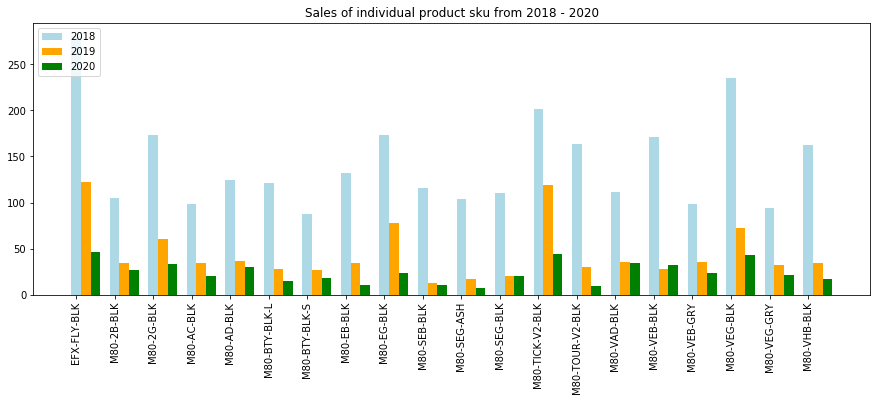

In [24]:
plt.figure(figsize=(15,5))
y_pos = np.arange(len(prod_yearly.columns))
plt.bar(y_pos+0,    prod_yearly.iloc[1,:].values, width=0.25, color = 'lightblue')
plt.bar(y_pos+0.25, prod_yearly.iloc[2,:].values, width=0.25, color = 'orange')
plt.bar(y_pos+0.50, prod_yearly.iloc[3,:].values, width=0.25, color = 'green')
plt.legend(["2018", "2019", "2020"], loc="upper left")
plt.title('Sales of individual product sku from 2018 - 2020')
plt.xticks(y_pos, prod_yearly.columns)
plt.xticks(rotation=90)
plt.show()

#### Plotting across months for the top 20 product skus

In [25]:
prod_monthly = pd.crosstab(df.index, df['product_sku']).resample('M').sum()

In [26]:
x_labels = list(prod_monthly.index.strftime('%Y-%m').values)

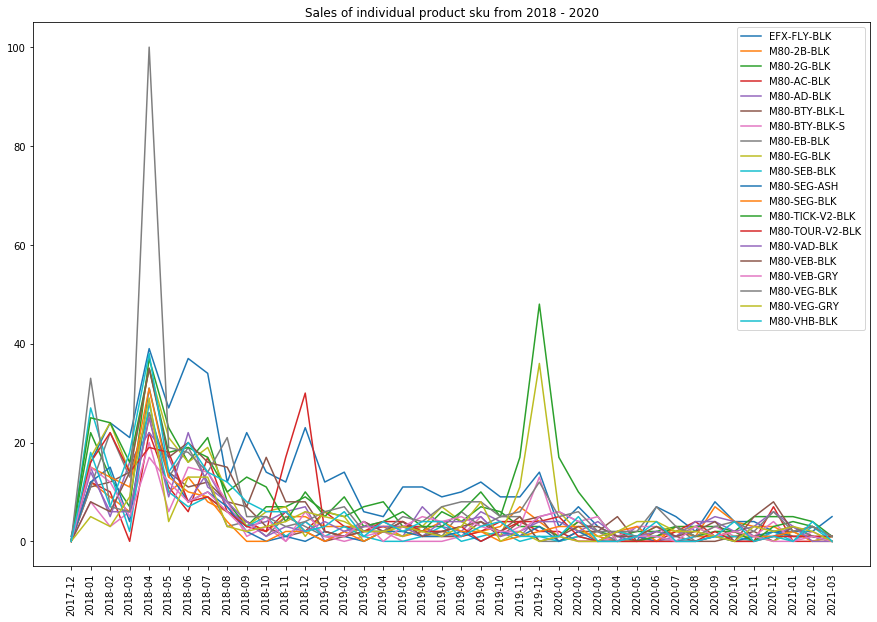

In [29]:
plt.figure(figsize=(15,10))
for prod in list(prod_monthly.columns):
    plt.plot(x_labels, prod_monthly[prod], label=prod)
plt.title('Sales of individual product sku from 2018 - 2020')
plt.xticks(np.arange(len(x_labels)),x_labels, rotation=90)
plt.legend(loc='upper right')
plt.show()

In [30]:
### There are seasonal trends like in Apr, June, Sep and Dec where sales tend to peak